In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy


In [2]:
def make_cycle_graph(size):
    x_nodes = range(size)
    x_edges = [
        (i,(i+1)%size) for i in x_nodes
    ]
    XG = nx.DiGraph()
    XG.add_nodes_from(x_nodes)
    XG.add_edges_from(x_edges)
    return XG



In [3]:
def display_graph(g):
    nx.draw_planar(g, with_labels=True, font_weight='bold')


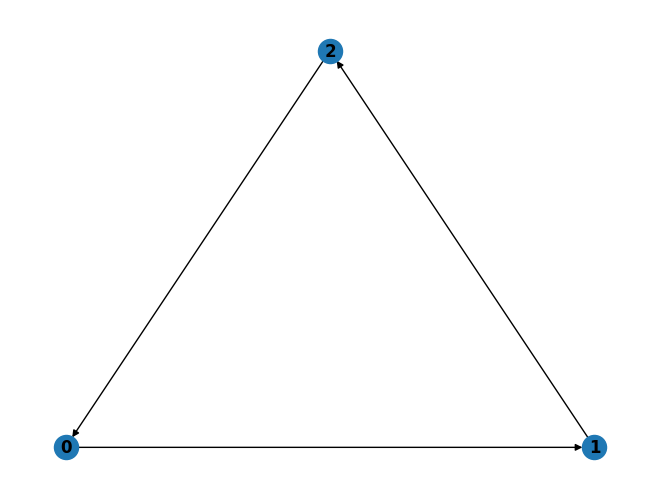

In [4]:
display_graph(make_cycle_graph(3))

In [5]:
def graph_product(A,B):
    nodes = []
    edges = []

    a_pos = {}
    b_pos = {}
    c_pos = {}
    
    for i,a in enumerate(A):
        a_next = list(A.successors(a))
        # this only works for endomaps
        a_pos[a] = (0,i)
        assert len(a_next) == 1
        for j,b in enumerate(B):
            b_next = list(B.successors(b))
            assert len(b_next) == 1
            b_pos[b] = (j,0)
            nodes.append(str([a,b]))
            edges.append((str([a,b]),str([a_next[0],b_next[0]])))
            c_pos[str([a,b])] = (j+1,i+1)
            
    print(nodes)
    print(edges)

    print(c_pos)
    
    C = nx.DiGraph()
    C.add_nodes_from(nodes)
    C.add_edges_from(edges)
    fig, all_axes = plt.subplots(2, 2)
    ax = all_axes.flat

    nx.draw_shell(A, ax=ax[0], with_labels=True, font_weight='bold')

    nx.draw_planar(C, ax=ax[1], with_labels=True, font_weight='bold')

    nx.draw_shell(B, ax=ax[3], with_labels=True, font_weight='bold')
    ax[2].axis('off')
    plt.show()
    
    return C



['[0, 0]', '[0, 1]', '[0, 2]', '[1, 0]', '[1, 1]', '[1, 2]']
[('[0, 0]', '[1, 1]'), ('[0, 1]', '[1, 2]'), ('[0, 2]', '[1, 0]'), ('[1, 0]', '[0, 1]'), ('[1, 1]', '[0, 2]'), ('[1, 2]', '[0, 0]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[0, 2]': (3, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2), '[1, 2]': (3, 2)}


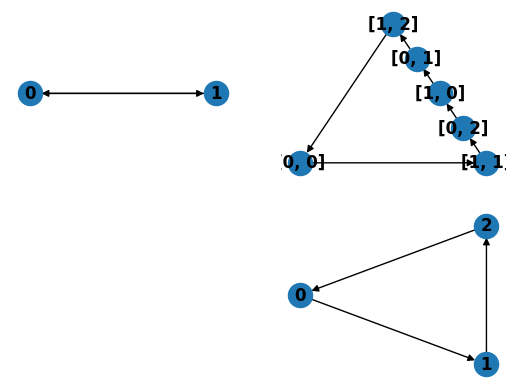

In [6]:
p1 = graph_product(make_cycle_graph(2),make_cycle_graph(3))

['[0, 0]', '[0, 1]', '[0, 2]', '[0, 3]', '[1, 0]', '[1, 1]', '[1, 2]', '[1, 3]']
[('[0, 0]', '[1, 1]'), ('[0, 1]', '[1, 2]'), ('[0, 2]', '[1, 3]'), ('[0, 3]', '[1, 0]'), ('[1, 0]', '[0, 1]'), ('[1, 1]', '[0, 2]'), ('[1, 2]', '[0, 3]'), ('[1, 3]', '[0, 0]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[0, 2]': (3, 1), '[0, 3]': (4, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2), '[1, 2]': (3, 2), '[1, 3]': (4, 2)}


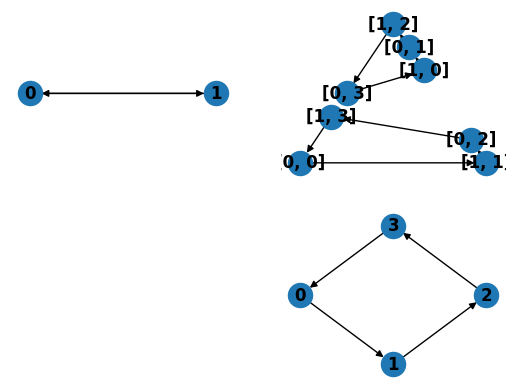

In [7]:
p2 = graph_product(make_cycle_graph(2),make_cycle_graph(4))


['[0, 0]', '[0, 1]', '[0, 2]', '[0, 3]', '[0, 4]', '[0, 5]', '[0, 6]', '[0, 7]', '[1, 0]', '[1, 1]', '[1, 2]', '[1, 3]', '[1, 4]', '[1, 5]', '[1, 6]', '[1, 7]', '[2, 0]', '[2, 1]', '[2, 2]', '[2, 3]', '[2, 4]', '[2, 5]', '[2, 6]', '[2, 7]', '[3, 0]', '[3, 1]', '[3, 2]', '[3, 3]', '[3, 4]', '[3, 5]', '[3, 6]', '[3, 7]', '[4, 0]', '[4, 1]', '[4, 2]', '[4, 3]', '[4, 4]', '[4, 5]', '[4, 6]', '[4, 7]', '[5, 0]', '[5, 1]', '[5, 2]', '[5, 3]', '[5, 4]', '[5, 5]', '[5, 6]', '[5, 7]']
[('[0, 0]', '[1, 1]'), ('[0, 1]', '[1, 2]'), ('[0, 2]', '[1, 3]'), ('[0, 3]', '[1, 4]'), ('[0, 4]', '[1, 5]'), ('[0, 5]', '[1, 6]'), ('[0, 6]', '[1, 7]'), ('[0, 7]', '[1, 0]'), ('[1, 0]', '[2, 1]'), ('[1, 1]', '[2, 2]'), ('[1, 2]', '[2, 3]'), ('[1, 3]', '[2, 4]'), ('[1, 4]', '[2, 5]'), ('[1, 5]', '[2, 6]'), ('[1, 6]', '[2, 7]'), ('[1, 7]', '[2, 0]'), ('[2, 0]', '[3, 1]'), ('[2, 1]', '[3, 2]'), ('[2, 2]', '[3, 3]'), ('[2, 3]', '[3, 4]'), ('[2, 4]', '[3, 5]'), ('[2, 5]', '[3, 6]'), ('[2, 6]', '[3, 7]'), ('[2, 7]', '

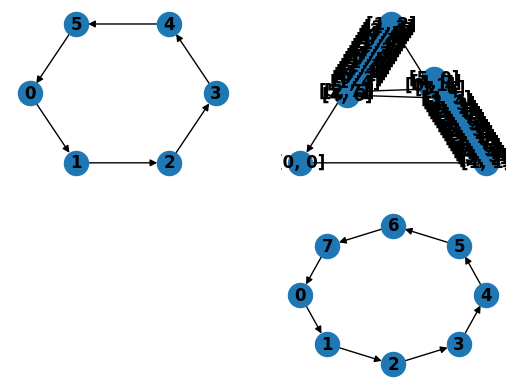

In [8]:
p3 = graph_product(make_cycle_graph(6),make_cycle_graph(8))


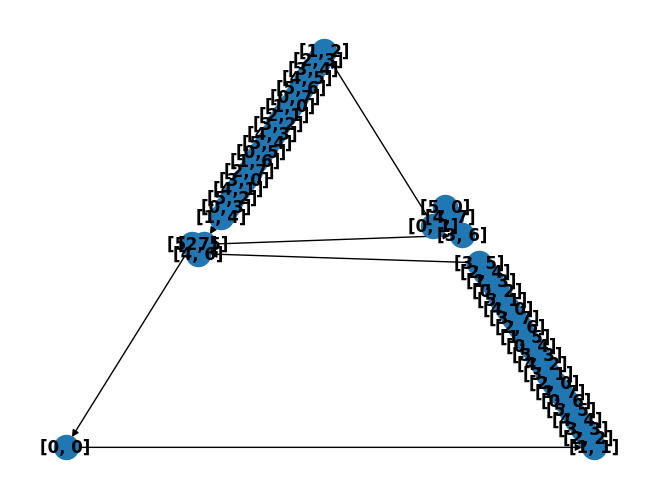

In [9]:
display_graph(p3)

['[0, 0]', '[0, 1]', '[0, 2]', '[0, 3]', '[0, 4]', '[0, 5]', '[1, 0]', '[1, 1]', '[1, 2]', '[1, 3]', '[1, 4]', '[1, 5]']
[('[0, 0]', '[1, 1]'), ('[0, 1]', '[1, 2]'), ('[0, 2]', '[1, 3]'), ('[0, 3]', '[1, 4]'), ('[0, 4]', '[1, 5]'), ('[0, 5]', '[1, 0]'), ('[1, 0]', '[0, 1]'), ('[1, 1]', '[0, 2]'), ('[1, 2]', '[0, 3]'), ('[1, 3]', '[0, 4]'), ('[1, 4]', '[0, 5]'), ('[1, 5]', '[0, 0]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[0, 2]': (3, 1), '[0, 3]': (4, 1), '[0, 4]': (5, 1), '[0, 5]': (6, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2), '[1, 2]': (3, 2), '[1, 3]': (4, 2), '[1, 4]': (5, 2), '[1, 5]': (6, 2)}


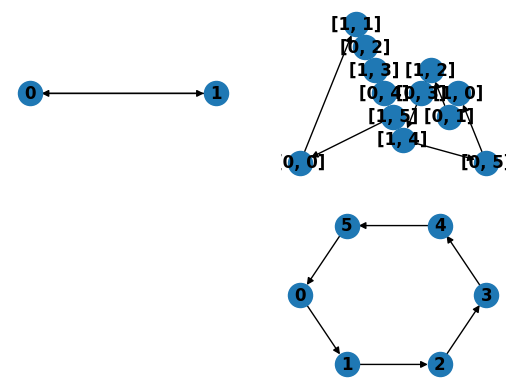

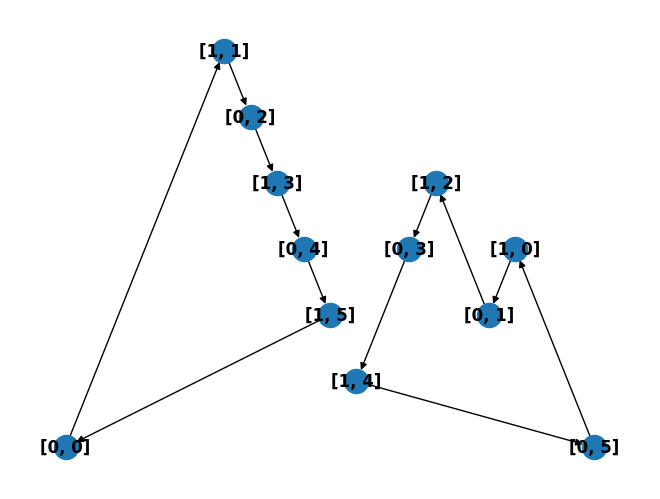

In [10]:
p4 = graph_product(make_cycle_graph(2),make_cycle_graph(6))
display_graph(p4)

['[0, 0]', '[0, 1]', '[0, 2]', '[0, 3]', '[0, 4]', '[0, 5]', '[1, 0]', '[1, 1]', '[1, 2]', '[1, 3]', '[1, 4]', '[1, 5]', '[2, 0]', '[2, 1]', '[2, 2]', '[2, 3]', '[2, 4]', '[2, 5]']
[('[0, 0]', '[1, 1]'), ('[0, 1]', '[1, 2]'), ('[0, 2]', '[1, 3]'), ('[0, 3]', '[1, 4]'), ('[0, 4]', '[1, 5]'), ('[0, 5]', '[1, 0]'), ('[1, 0]', '[2, 1]'), ('[1, 1]', '[2, 2]'), ('[1, 2]', '[2, 3]'), ('[1, 3]', '[2, 4]'), ('[1, 4]', '[2, 5]'), ('[1, 5]', '[2, 0]'), ('[2, 0]', '[0, 1]'), ('[2, 1]', '[0, 2]'), ('[2, 2]', '[0, 3]'), ('[2, 3]', '[0, 4]'), ('[2, 4]', '[0, 5]'), ('[2, 5]', '[0, 0]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[0, 2]': (3, 1), '[0, 3]': (4, 1), '[0, 4]': (5, 1), '[0, 5]': (6, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2), '[1, 2]': (3, 2), '[1, 3]': (4, 2), '[1, 4]': (5, 2), '[1, 5]': (6, 2), '[2, 0]': (1, 3), '[2, 1]': (2, 3), '[2, 2]': (3, 3), '[2, 3]': (4, 3), '[2, 4]': (5, 3), '[2, 5]': (6, 3)}


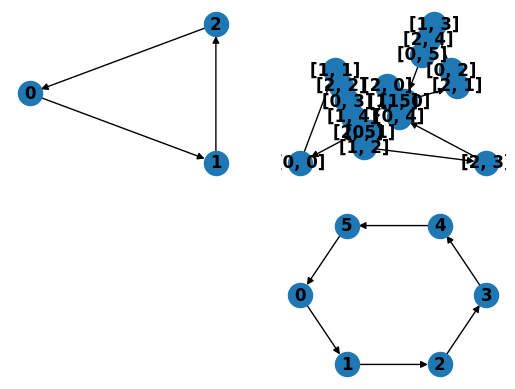

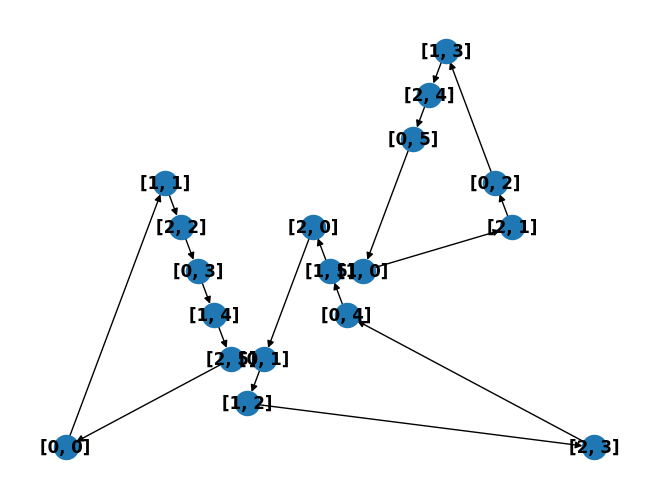

In [11]:
display_graph(graph_product(make_cycle_graph(3),make_cycle_graph(6)))

In [12]:
# okay, conjecture time
# the size is the least common multiple of the cycle lengths
# the number of cycles is the greatest common factor
from math import lcm, gcd

def cycle_conjecture(a,b):
    size = lcm(a,b)
    qty = gcd(a,b)
    print(f"C_{a} * C_{b} should have {qty} cycles of length {size}")


cycle_conjecture(2,3)
cycle_conjecture(2,4)
cycle_conjecture(2,6)
cycle_conjecture(3,6)
cycle_conjecture(6,8)
cycle_conjecture(8,3)
cycle_conjecture(12,8)






C_2 * C_3 should have 1 cycles of length 6
C_2 * C_4 should have 2 cycles of length 4
C_2 * C_6 should have 2 cycles of length 6
C_3 * C_6 should have 3 cycles of length 6
C_6 * C_8 should have 2 cycles of length 24
C_8 * C_3 should have 1 cycles of length 24
C_12 * C_8 should have 4 cycles of length 24


In [13]:
cycle_conjecture(8,24)

C_8 * C_24 should have 8 cycles of length 24


['[0, 0]', '[0, 1]', '[0, 2]', '[0, 3]', '[0, 4]', '[0, 5]', '[0, 6]', '[0, 7]', '[1, 0]', '[1, 1]', '[1, 2]', '[1, 3]', '[1, 4]', '[1, 5]', '[1, 6]', '[1, 7]', '[2, 0]', '[2, 1]', '[2, 2]', '[2, 3]', '[2, 4]', '[2, 5]', '[2, 6]', '[2, 7]', '[3, 0]', '[3, 1]', '[3, 2]', '[3, 3]', '[3, 4]', '[3, 5]', '[3, 6]', '[3, 7]', '[4, 0]', '[4, 1]', '[4, 2]', '[4, 3]', '[4, 4]', '[4, 5]', '[4, 6]', '[4, 7]', '[5, 0]', '[5, 1]', '[5, 2]', '[5, 3]', '[5, 4]', '[5, 5]', '[5, 6]', '[5, 7]', '[6, 0]', '[6, 1]', '[6, 2]', '[6, 3]', '[6, 4]', '[6, 5]', '[6, 6]', '[6, 7]', '[7, 0]', '[7, 1]', '[7, 2]', '[7, 3]', '[7, 4]', '[7, 5]', '[7, 6]', '[7, 7]', '[8, 0]', '[8, 1]', '[8, 2]', '[8, 3]', '[8, 4]', '[8, 5]', '[8, 6]', '[8, 7]', '[9, 0]', '[9, 1]', '[9, 2]', '[9, 3]', '[9, 4]', '[9, 5]', '[9, 6]', '[9, 7]', '[10, 0]', '[10, 1]', '[10, 2]', '[10, 3]', '[10, 4]', '[10, 5]', '[10, 6]', '[10, 7]', '[11, 0]', '[11, 1]', '[11, 2]', '[11, 3]', '[11, 4]', '[11, 5]', '[11, 6]', '[11, 7]']
[('[0, 0]', '[1, 1]'), 

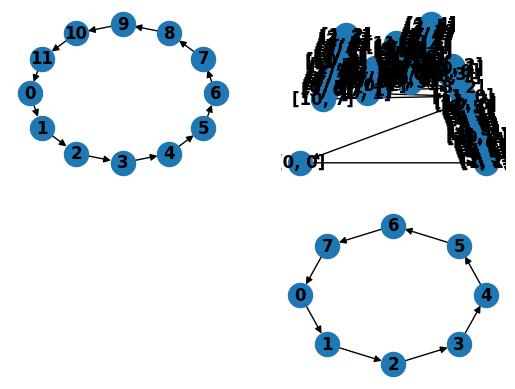

In [14]:
P_12_8 = graph_product(make_cycle_graph(12),make_cycle_graph(8))

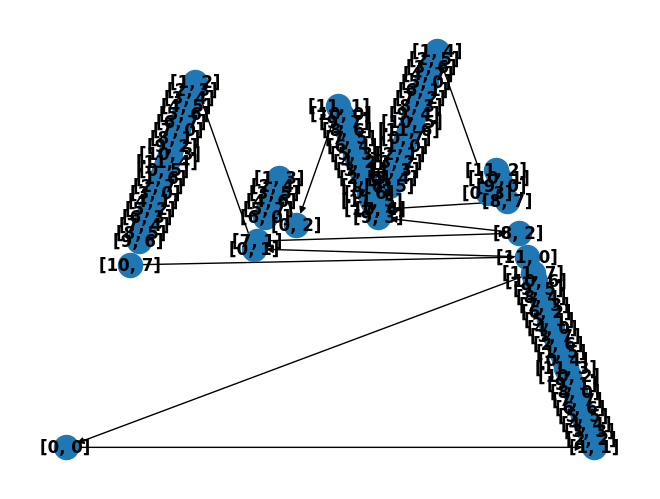

In [15]:
display_graph(P_12_8)

In [16]:
cycle_list = list(nx.simple_cycles(P_12_8))
print(len(cycle_list))
print("Lengths: ")
for c in cycle_list:
    print(len(c))
    

4
Lengths: 
24
24
24
24


In [17]:
def make_tail_graph(size):
    x_nodes = range(size)
    x_edges = [
        (i,max(i-1,0)) for i in x_nodes
    ]
    XG = nx.DiGraph()
    XG.add_nodes_from(x_nodes)
    XG.add_edges_from(x_edges)
    return XG


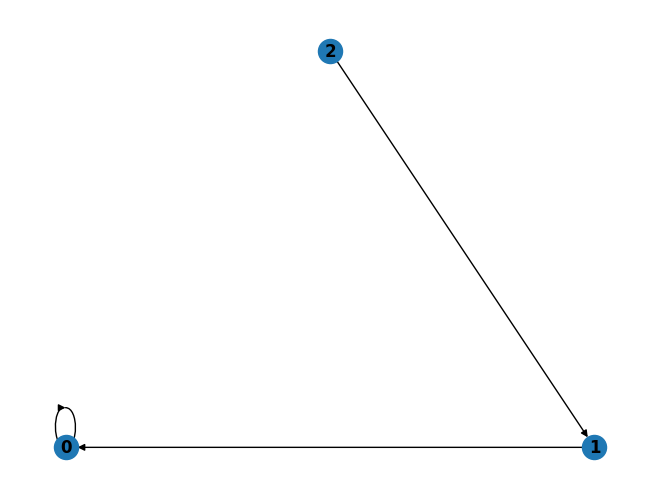

In [18]:
display_graph(make_tail_graph(3))

['[0, 0]', '[0, 1]', '[0, 2]', '[1, 0]', '[1, 1]', '[1, 2]']
[('[0, 0]', '[1, 0]'), ('[0, 1]', '[1, 0]'), ('[0, 2]', '[1, 1]'), ('[1, 0]', '[0, 0]'), ('[1, 1]', '[0, 0]'), ('[1, 2]', '[0, 1]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[0, 2]': (3, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2), '[1, 2]': (3, 2)}


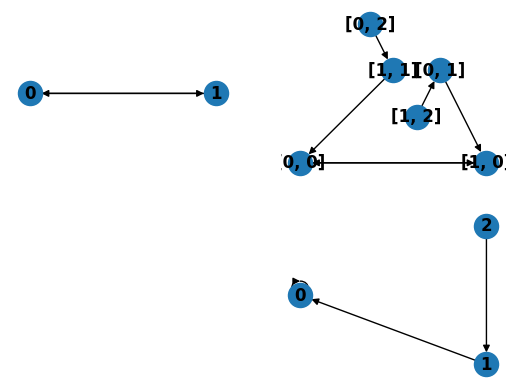

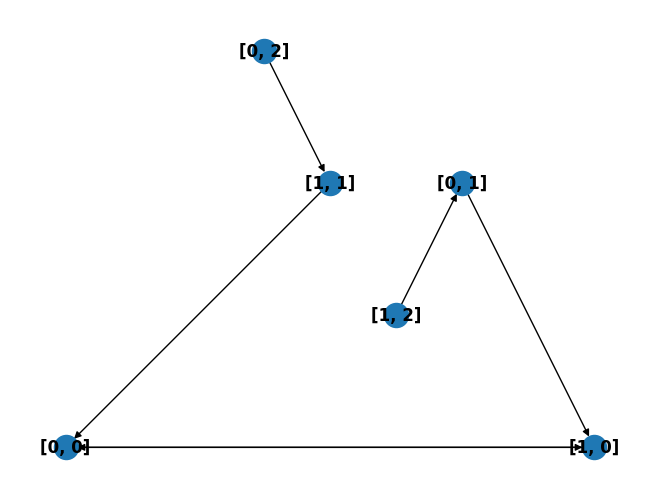

In [19]:
display_graph(graph_product(make_cycle_graph(2),make_tail_graph(3)))

['[0, 0]', '[0, 1]', '[1, 0]', '[1, 1]']
[('[0, 0]', '[1, 0]'), ('[0, 1]', '[1, 0]'), ('[1, 0]', '[0, 0]'), ('[1, 1]', '[0, 0]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2)}


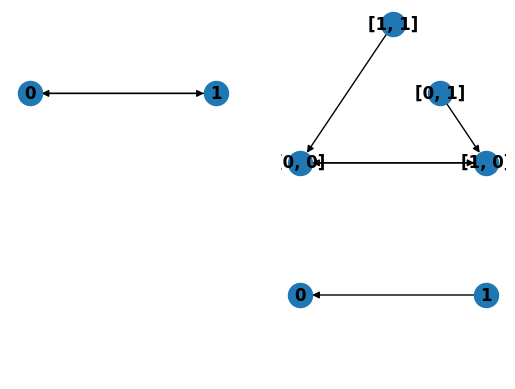

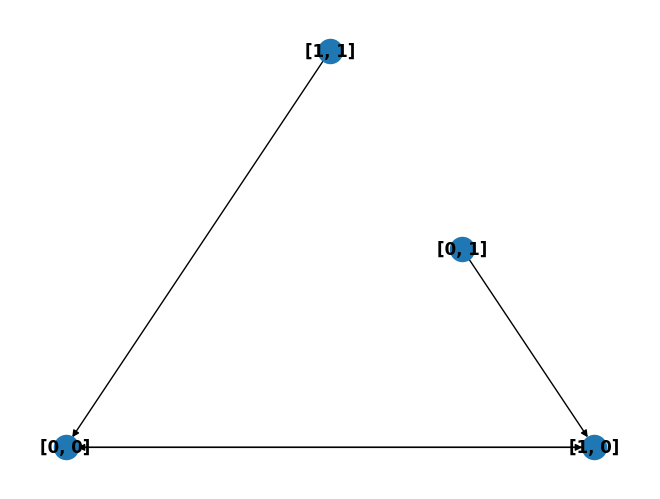

In [20]:
display_graph(graph_product(make_cycle_graph(2),make_tail_graph(2)))

['[0, 0]', '[0, 1]', '[0, 2]', '[1, 0]', '[1, 1]', '[1, 2]', '[2, 0]', '[2, 1]', '[2, 2]']
[('[0, 0]', '[1, 0]'), ('[0, 1]', '[1, 0]'), ('[0, 2]', '[1, 1]'), ('[1, 0]', '[2, 0]'), ('[1, 1]', '[2, 0]'), ('[1, 2]', '[2, 1]'), ('[2, 0]', '[0, 0]'), ('[2, 1]', '[0, 0]'), ('[2, 2]', '[0, 1]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[0, 2]': (3, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2), '[1, 2]': (3, 2), '[2, 0]': (1, 3), '[2, 1]': (2, 3), '[2, 2]': (3, 3)}


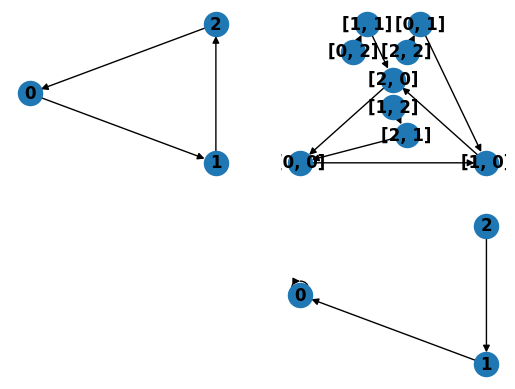

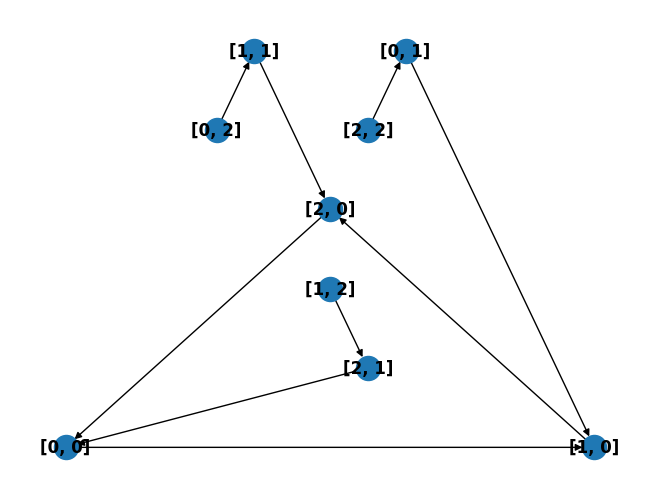

In [21]:
display_graph(graph_product(make_cycle_graph(3),make_tail_graph(3)))

['[0, 0]', '[0, 1]', '[0, 2]', '[1, 0]', '[1, 1]', '[1, 2]']
[('[0, 0]', '[0, 0]'), ('[0, 1]', '[0, 0]'), ('[0, 2]', '[0, 1]'), ('[1, 0]', '[0, 0]'), ('[1, 1]', '[0, 0]'), ('[1, 2]', '[0, 1]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[0, 2]': (3, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2), '[1, 2]': (3, 2)}


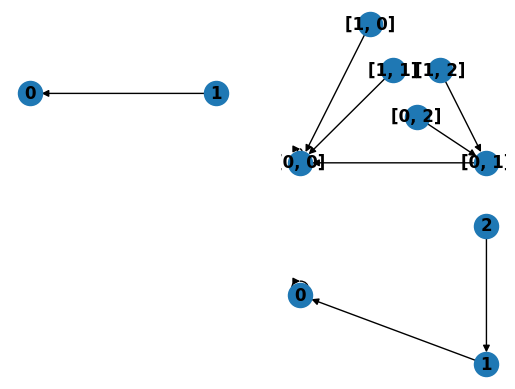

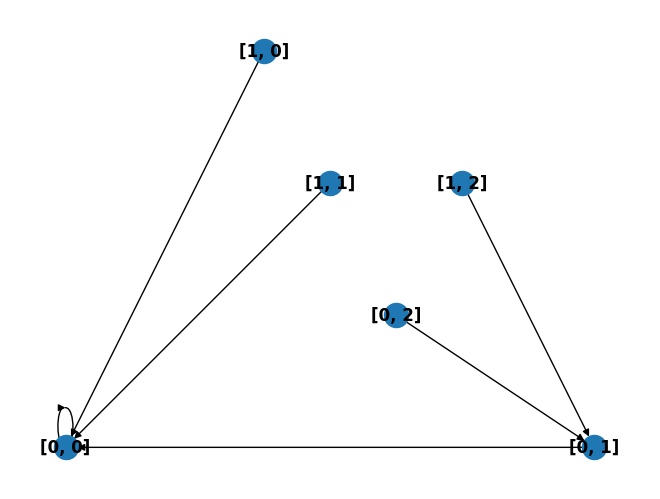

In [22]:
display_graph(graph_product(make_tail_graph(2),make_tail_graph(3)))

['[0, 0]', '[0, 1]', '[0, 2]', '[0, 3]', '[0, 4]', '[0, 5]', '[0, 6]', '[0, 7]', '[1, 0]', '[1, 1]', '[1, 2]', '[1, 3]', '[1, 4]', '[1, 5]', '[1, 6]', '[1, 7]', '[2, 0]', '[2, 1]', '[2, 2]', '[2, 3]', '[2, 4]', '[2, 5]', '[2, 6]', '[2, 7]']
[('[0, 0]', '[1, 0]'), ('[0, 1]', '[1, 0]'), ('[0, 2]', '[1, 1]'), ('[0, 3]', '[1, 2]'), ('[0, 4]', '[1, 3]'), ('[0, 5]', '[1, 4]'), ('[0, 6]', '[1, 5]'), ('[0, 7]', '[1, 6]'), ('[1, 0]', '[2, 0]'), ('[1, 1]', '[2, 0]'), ('[1, 2]', '[2, 1]'), ('[1, 3]', '[2, 2]'), ('[1, 4]', '[2, 3]'), ('[1, 5]', '[2, 4]'), ('[1, 6]', '[2, 5]'), ('[1, 7]', '[2, 6]'), ('[2, 0]', '[0, 0]'), ('[2, 1]', '[0, 0]'), ('[2, 2]', '[0, 1]'), ('[2, 3]', '[0, 2]'), ('[2, 4]', '[0, 3]'), ('[2, 5]', '[0, 4]'), ('[2, 6]', '[0, 5]'), ('[2, 7]', '[0, 6]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[0, 2]': (3, 1), '[0, 3]': (4, 1), '[0, 4]': (5, 1), '[0, 5]': (6, 1), '[0, 6]': (7, 1), '[0, 7]': (8, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2), '[1, 2]': (3, 2), '[1, 3]': (4, 2), '[1, 4]': (5,

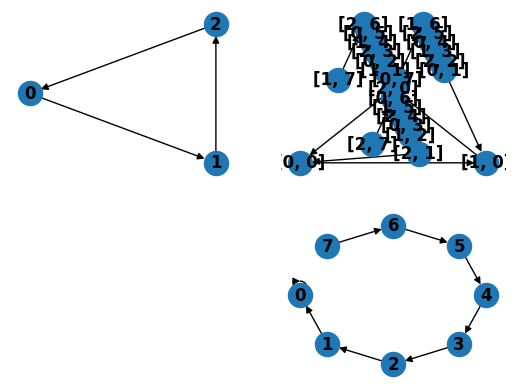

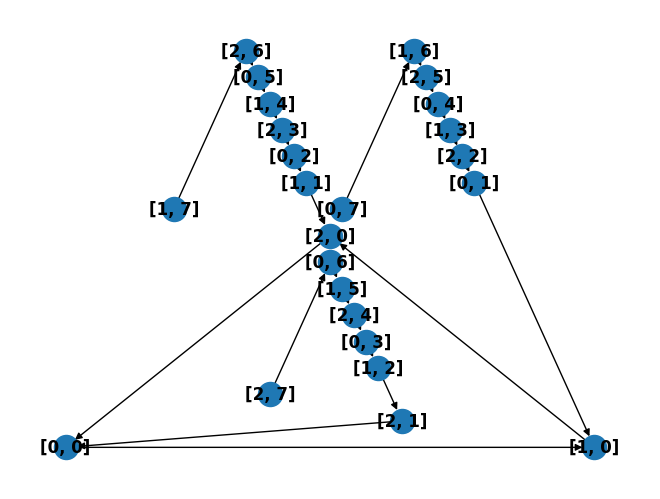

In [23]:
P_3C_8T = graph_product(make_cycle_graph(3),make_tail_graph(8))
display_graph(P_3C_8T)

["[0, '[0, 0]']", "[0, '[0, 1]']", "[0, '[0, 2]']", "[0, '[0, 3]']", "[0, '[0, 4]']", "[0, '[0, 5]']", "[0, '[0, 6]']", "[0, '[0, 7]']", "[0, '[1, 0]']", "[0, '[1, 1]']", "[0, '[1, 2]']", "[0, '[1, 3]']", "[0, '[1, 4]']", "[0, '[1, 5]']", "[0, '[1, 6]']", "[0, '[1, 7]']", "[0, '[2, 0]']", "[0, '[2, 1]']", "[0, '[2, 2]']", "[0, '[2, 3]']", "[0, '[2, 4]']", "[0, '[2, 5]']", "[0, '[2, 6]']", "[0, '[2, 7]']", "[1, '[0, 0]']", "[1, '[0, 1]']", "[1, '[0, 2]']", "[1, '[0, 3]']", "[1, '[0, 4]']", "[1, '[0, 5]']", "[1, '[0, 6]']", "[1, '[0, 7]']", "[1, '[1, 0]']", "[1, '[1, 1]']", "[1, '[1, 2]']", "[1, '[1, 3]']", "[1, '[1, 4]']", "[1, '[1, 5]']", "[1, '[1, 6]']", "[1, '[1, 7]']", "[1, '[2, 0]']", "[1, '[2, 1]']", "[1, '[2, 2]']", "[1, '[2, 3]']", "[1, '[2, 4]']", "[1, '[2, 5]']", "[1, '[2, 6]']", "[1, '[2, 7]']", "[2, '[0, 0]']", "[2, '[0, 1]']", "[2, '[0, 2]']", "[2, '[0, 3]']", "[2, '[0, 4]']", "[2, '[0, 5]']", "[2, '[0, 6]']", "[2, '[0, 7]']", "[2, '[1, 0]']", "[2, '[1, 1]']", "[2, '[1, 2]'

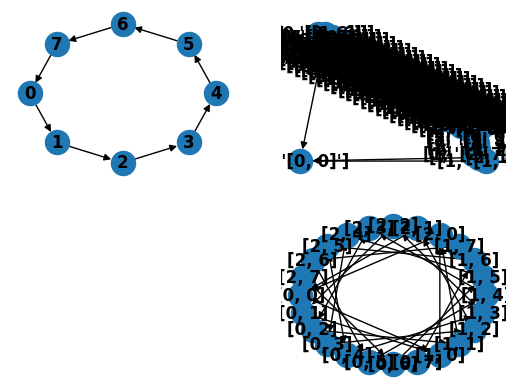

In [24]:
MY_G = graph_product(make_cycle_graph(8),P_3C_8T)

In [25]:
def cycle_info(G):
    cycle_list = list(nx.simple_cycles(G))
    print(len(cycle_list))
    print("Lengths: ")
    for c in cycle_list:
        print(len(c))
cycle_info(MY_G)

1
Lengths: 
24


In [26]:
len(MY_G.nodes)

192

['[0, 0]', '[0, 1]', '[0, 2]', '[1, 0]', '[1, 1]', '[1, 2]', '[2, 0]', '[2, 1]', '[2, 2]', '[3, 0]', '[3, 1]', '[3, 2]', '[4, 0]', '[4, 1]', '[4, 2]', '[5, 0]', '[5, 1]', '[5, 2]', '[6, 0]', '[6, 1]', '[6, 2]', '[7, 0]', '[7, 1]', '[7, 2]']
[('[0, 0]', '[0, 1]'), ('[0, 1]', '[0, 2]'), ('[0, 2]', '[0, 0]'), ('[1, 0]', '[0, 1]'), ('[1, 1]', '[0, 2]'), ('[1, 2]', '[0, 0]'), ('[2, 0]', '[1, 1]'), ('[2, 1]', '[1, 2]'), ('[2, 2]', '[1, 0]'), ('[3, 0]', '[2, 1]'), ('[3, 1]', '[2, 2]'), ('[3, 2]', '[2, 0]'), ('[4, 0]', '[3, 1]'), ('[4, 1]', '[3, 2]'), ('[4, 2]', '[3, 0]'), ('[5, 0]', '[4, 1]'), ('[5, 1]', '[4, 2]'), ('[5, 2]', '[4, 0]'), ('[6, 0]', '[5, 1]'), ('[6, 1]', '[5, 2]'), ('[6, 2]', '[5, 0]'), ('[7, 0]', '[6, 1]'), ('[7, 1]', '[6, 2]'), ('[7, 2]', '[6, 0]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[0, 2]': (3, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2), '[1, 2]': (3, 2), '[2, 0]': (1, 3), '[2, 1]': (2, 3), '[2, 2]': (3, 3), '[3, 0]': (1, 4), '[3, 1]': (2, 4), '[3, 2]': (3, 4), '[4, 0]': (1,

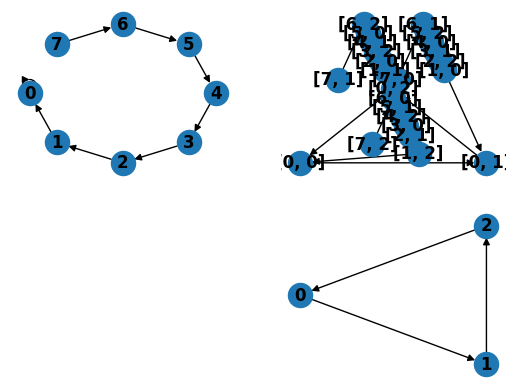

In [27]:
P_T8xC3 = graph_product(make_tail_graph(8),make_cycle_graph(3))

1
Lengths: 
3


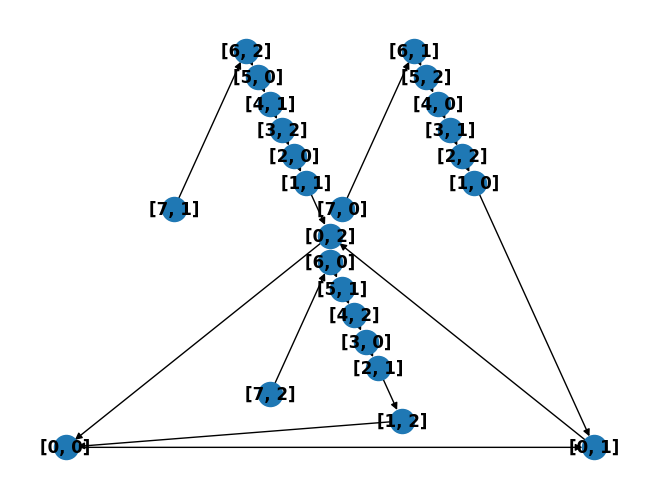

In [28]:
display_graph(P_T8xC3)
cycle_info(P_T8xC3)

['[0, 0]', '[0, 1]', '[0, 2]', '[0, 3]', '[0, 4]', '[0, 5]', '[0, 6]', '[0, 7]', '[0, 8]', '[0, 9]', '[0, 10]', '[0, 11]', '[0, 12]', '[0, 13]', '[0, 14]', '[0, 15]', '[0, 16]', '[0, 17]', '[0, 18]', '[0, 19]', '[0, 20]', '[0, 21]', '[0, 22]', '[0, 23]', '[1, 0]', '[1, 1]', '[1, 2]', '[1, 3]', '[1, 4]', '[1, 5]', '[1, 6]', '[1, 7]', '[1, 8]', '[1, 9]', '[1, 10]', '[1, 11]', '[1, 12]', '[1, 13]', '[1, 14]', '[1, 15]', '[1, 16]', '[1, 17]', '[1, 18]', '[1, 19]', '[1, 20]', '[1, 21]', '[1, 22]', '[1, 23]', '[2, 0]', '[2, 1]', '[2, 2]', '[2, 3]', '[2, 4]', '[2, 5]', '[2, 6]', '[2, 7]', '[2, 8]', '[2, 9]', '[2, 10]', '[2, 11]', '[2, 12]', '[2, 13]', '[2, 14]', '[2, 15]', '[2, 16]', '[2, 17]', '[2, 18]', '[2, 19]', '[2, 20]', '[2, 21]', '[2, 22]', '[2, 23]', '[3, 0]', '[3, 1]', '[3, 2]', '[3, 3]', '[3, 4]', '[3, 5]', '[3, 6]', '[3, 7]', '[3, 8]', '[3, 9]', '[3, 10]', '[3, 11]', '[3, 12]', '[3, 13]', '[3, 14]', '[3, 15]', '[3, 16]', '[3, 17]', '[3, 18]', '[3, 19]', '[3, 20]', '[3, 21]', '[3, 

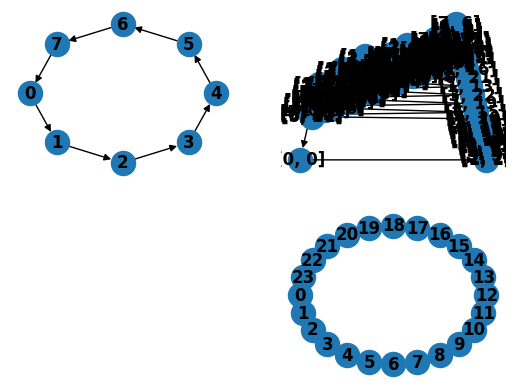

In [29]:
P_C8xC24 = graph_product(make_cycle_graph(8),make_cycle_graph(24))

8
Lengths: 
24
24
24
24
24
24
24
24


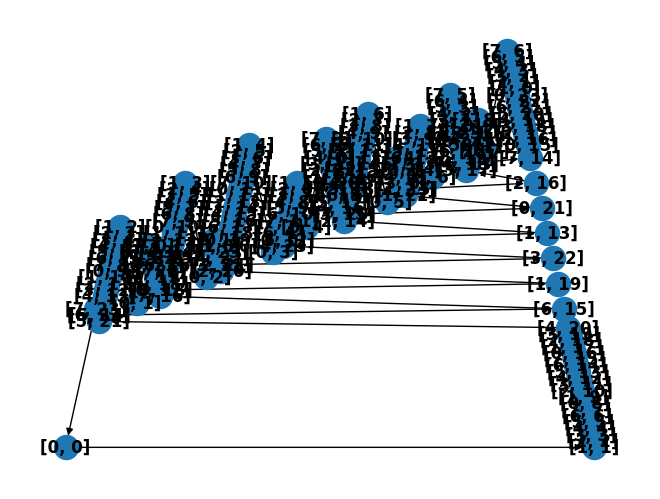

In [30]:
display_graph(P_C8xC24)
cycle_info(P_C8xC24)

['[0, 0]', '[0, 1]', '[0, 2]', '[1, 0]', '[1, 1]', '[1, 2]', '[2, 0]', '[2, 1]', '[2, 2]', '[3, 0]', '[3, 1]', '[3, 2]', '[4, 0]', '[4, 1]', '[4, 2]', '[5, 0]', '[5, 1]', '[5, 2]', '[6, 0]', '[6, 1]', '[6, 2]', '[7, 0]', '[7, 1]', '[7, 2]']
[('[0, 0]', '[1, 1]'), ('[0, 1]', '[1, 2]'), ('[0, 2]', '[1, 0]'), ('[1, 0]', '[2, 1]'), ('[1, 1]', '[2, 2]'), ('[1, 2]', '[2, 0]'), ('[2, 0]', '[3, 1]'), ('[2, 1]', '[3, 2]'), ('[2, 2]', '[3, 0]'), ('[3, 0]', '[4, 1]'), ('[3, 1]', '[4, 2]'), ('[3, 2]', '[4, 0]'), ('[4, 0]', '[5, 1]'), ('[4, 1]', '[5, 2]'), ('[4, 2]', '[5, 0]'), ('[5, 0]', '[6, 1]'), ('[5, 1]', '[6, 2]'), ('[5, 2]', '[6, 0]'), ('[6, 0]', '[7, 1]'), ('[6, 1]', '[7, 2]'), ('[6, 2]', '[7, 0]'), ('[7, 0]', '[0, 1]'), ('[7, 1]', '[0, 2]'), ('[7, 2]', '[0, 0]')]
{'[0, 0]': (1, 1), '[0, 1]': (2, 1), '[0, 2]': (3, 1), '[1, 0]': (1, 2), '[1, 1]': (2, 2), '[1, 2]': (3, 2), '[2, 0]': (1, 3), '[2, 1]': (2, 3), '[2, 2]': (3, 3), '[3, 0]': (1, 4), '[3, 1]': (2, 4), '[3, 2]': (3, 4), '[4, 0]': (1,

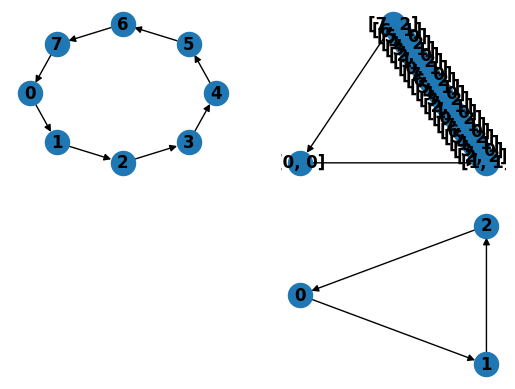

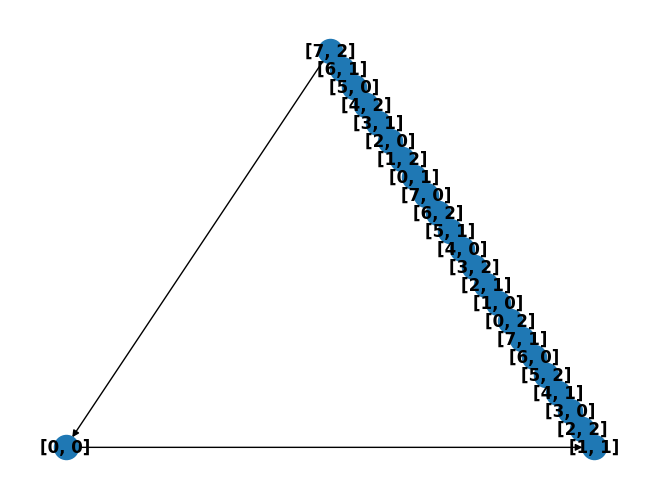

In [31]:
display_graph(graph_product(make_cycle_graph(8),make_cycle_graph(3)))

In [4]:
# yes, i'm cheating here to produce my table faster, but it's true!
for n in range(24):
    v = [n,n%8,n%3,(n+1)%24,(n+1)%8,(n+1)%3]
    vs = [str(i) for i in v]
    cells = [
        str(vs[0]), 
        "\\langle "+vs[1]+", "+vs[2]+" \\rangle",
        vs[3],
        vs[4],
        vs[4],
        vs[5],
        vs[5],
        "\\langle "+vs[4]+", "+vs[5]+" \\rangle"
    ]
    output = ""
    print("\t<row>")
    print("\t\t<cell><m>"+"</m></cell>\n\t\t<cell><m>".join(cells) +"</m></cell>")
    print("\t</row>")
    

	<row>
		<cell><m>0</m></cell>
		<cell><m>\langle 0, 0 \rangle</m></cell>
		<cell><m>1</m></cell>
		<cell><m>1</m></cell>
		<cell><m>1</m></cell>
		<cell><m>1</m></cell>
		<cell><m>1</m></cell>
		<cell><m>\langle 1, 1 \rangle</m></cell>
	</row>
	<row>
		<cell><m>1</m></cell>
		<cell><m>\langle 1, 1 \rangle</m></cell>
		<cell><m>2</m></cell>
		<cell><m>2</m></cell>
		<cell><m>2</m></cell>
		<cell><m>2</m></cell>
		<cell><m>2</m></cell>
		<cell><m>\langle 2, 2 \rangle</m></cell>
	</row>
	<row>
		<cell><m>2</m></cell>
		<cell><m>\langle 2, 2 \rangle</m></cell>
		<cell><m>3</m></cell>
		<cell><m>3</m></cell>
		<cell><m>3</m></cell>
		<cell><m>0</m></cell>
		<cell><m>0</m></cell>
		<cell><m>\langle 3, 0 \rangle</m></cell>
	</row>
	<row>
		<cell><m>3</m></cell>
		<cell><m>\langle 3, 0 \rangle</m></cell>
		<cell><m>4</m></cell>
		<cell><m>4</m></cell>
		<cell><m>4</m></cell>
		<cell><m>1</m></cell>
		<cell><m>1</m></cell>
		<cell><m>\langle 4, 1 \rangle</m></cell>
	</row>
	<row>
		<cell><m>4<

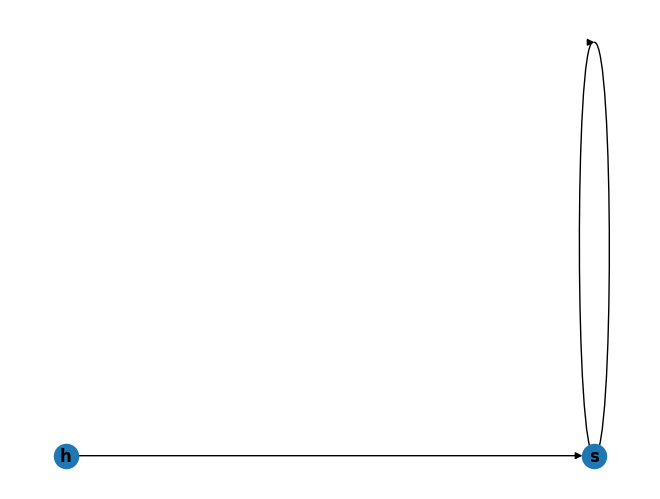

In [45]:
E3_G_m = nx.DiGraph()
E3_G_m.add_nodes_from(["h","s"])
E3_G_m.add_edges_from([("h","s"),("s","s")])
display_graph(E3_G_m)

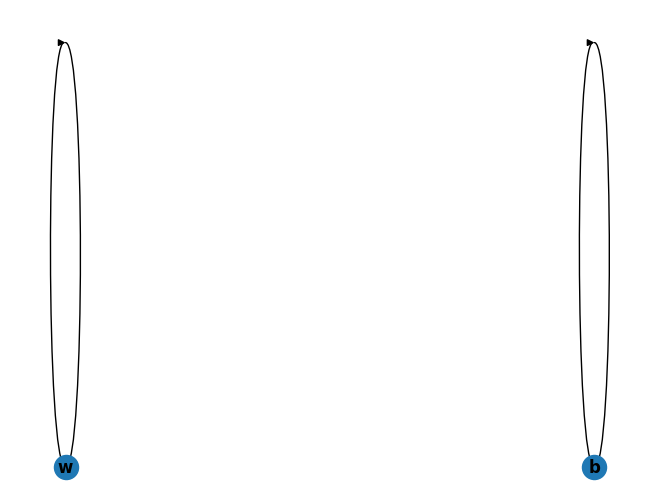

In [46]:
E3_C_m = nx.DiGraph()
E3_C_m.add_nodes_from(["w","b"])
E3_C_m.add_edges_from([("w","w"),("b","b")])
display_graph(E3_C_m)

["['h', 'w']", "['h', 'b']", "['s', 'w']", "['s', 'b']"]
[("['h', 'w']", "['s', 'w']"), ("['h', 'b']", "['s', 'b']"), ("['s', 'w']", "['s', 'w']"), ("['s', 'b']", "['s', 'b']")]
{"['h', 'w']": (1, 1), "['h', 'b']": (2, 1), "['s', 'w']": (1, 2), "['s', 'b']": (2, 2)}


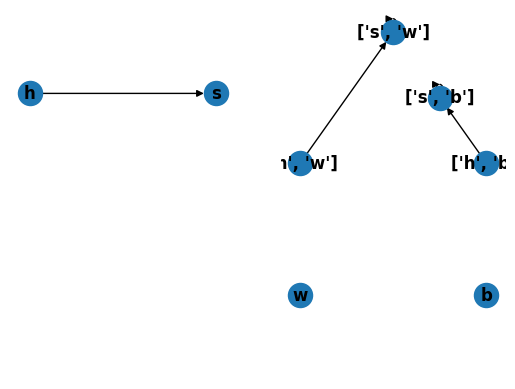

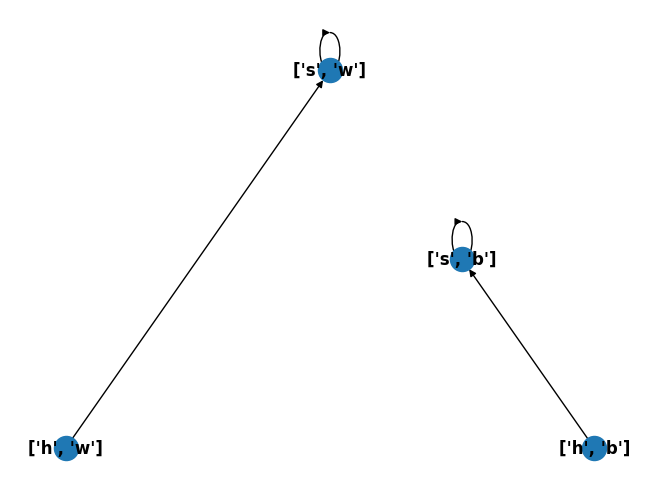

In [47]:
display_graph(graph_product(E3_G_m,E3_C_m))

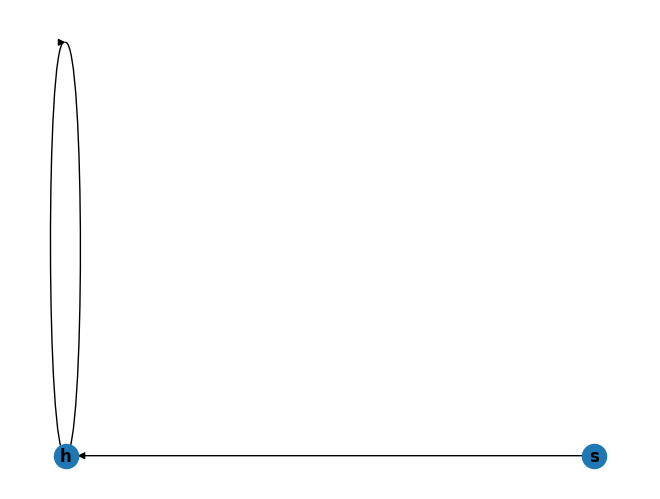

In [48]:
E3_G_f = nx.DiGraph()
E3_G_f.add_nodes_from(["h","s"])
E3_G_f.add_edges_from([("h","h"),("s","h")])
display_graph(E3_G_f)

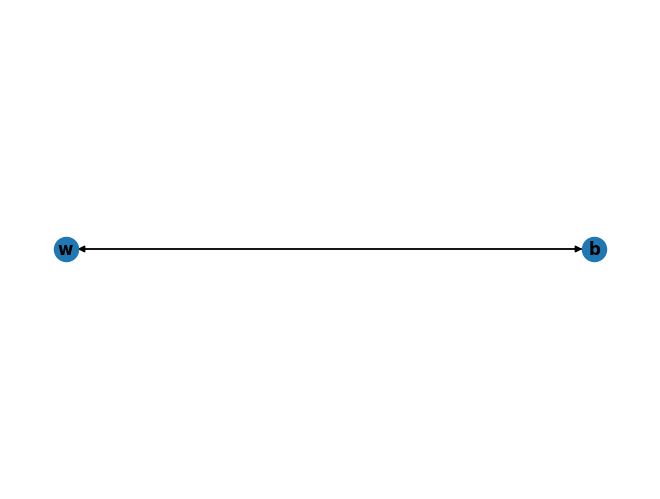

In [49]:
E3_C_f = nx.DiGraph()
E3_C_f.add_nodes_from(["w","b"])
E3_C_f.add_edges_from([("w","b"),("b","w")])
display_graph(E3_C_f)

["['h', 'w']", "['h', 'b']", "['s', 'w']", "['s', 'b']"]
[("['h', 'w']", "['h', 'b']"), ("['h', 'b']", "['h', 'w']"), ("['s', 'w']", "['h', 'b']"), ("['s', 'b']", "['h', 'w']")]
{"['h', 'w']": (1, 1), "['h', 'b']": (2, 1), "['s', 'w']": (1, 2), "['s', 'b']": (2, 2)}


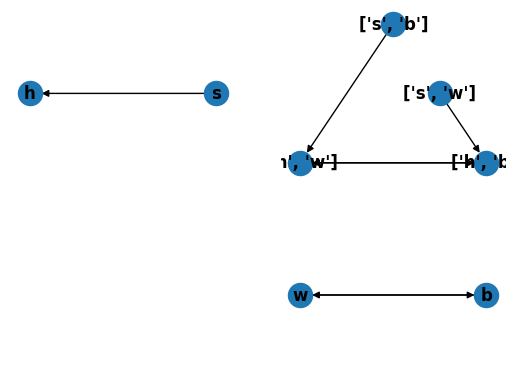

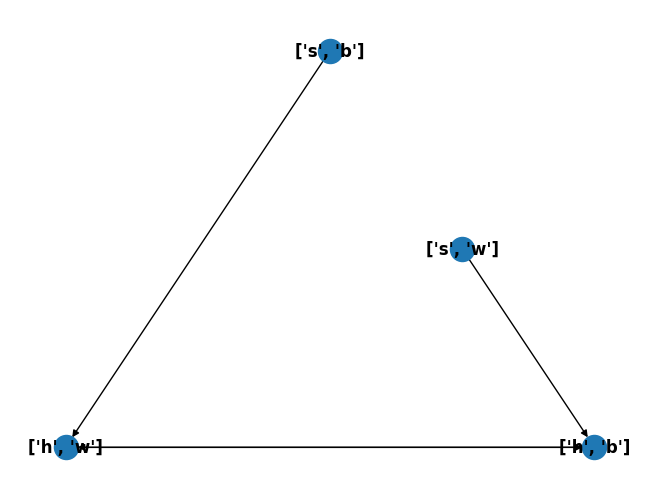

In [50]:
display_graph(graph_product(E3_G_f,E3_C_f))